## 1. Loading and Visualizing the Traffic Light Dataset

In [403]:
import cv2 # computer vision library
import helpers # helper functions

import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # for loading in images

%matplotlib inline

In [404]:
# Image data directories
IMAGE_DIR_TRAINING = "traffic_light_images/training/"
IMAGE_DIR_TEST = "traffic_light_images/test/"

In [405]:
# Using the load_dataset function in helpers.py
# Load training data
IMAGE_LIST = helpers.load_dataset(IMAGE_DIR_TRAINING)

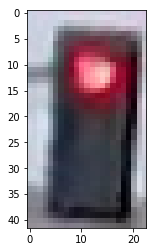

In [406]:
# The first image in IMAGE_LIST is displayed below (without information about shape or label)
selected_image = IMAGE_LIST[0][0]
plt.imshow(selected_image)

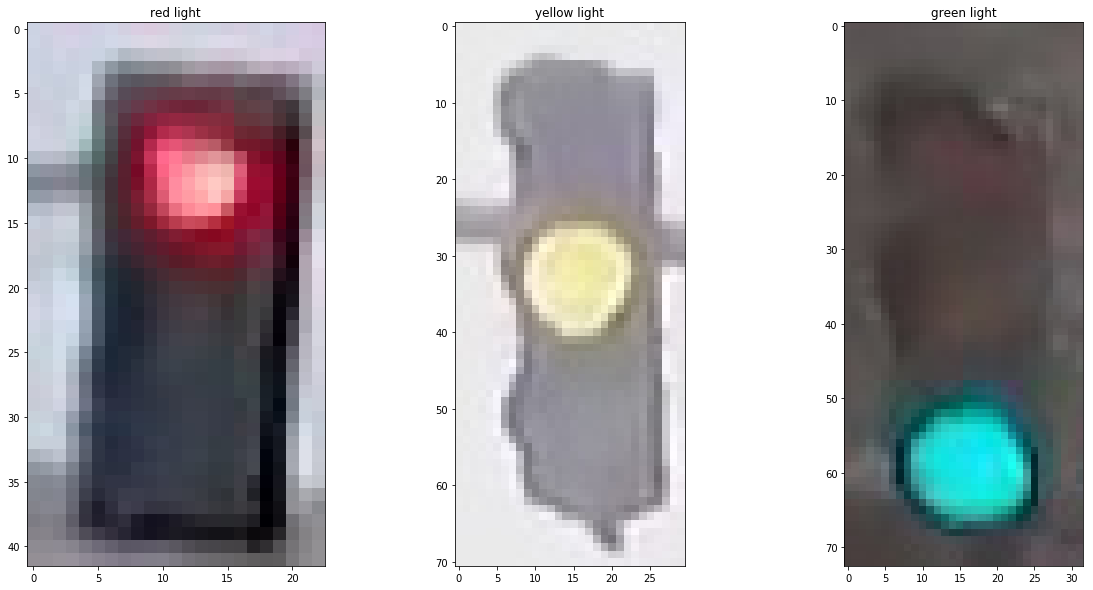

In [407]:
## TODO: Write code to display an image in IMAGE_LIST (try finding a yellow traffic light!)
## TODO: Print out 1. The shape of the image and 2. The image's label

# ANSWER: Below I have created 3 sub plots, and plotted each image type, along with type as Title.
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

# red image
num = 0 # 0 to 722 is red 
red_image = IMAGE_LIST[num][0]
red_label = IMAGE_LIST[num][1]
ax1.set_title(red_label + ' light')
ax1.imshow(red_image)

# yellow image
num = 723  # 723 to 757 is yellow 
yellow_image = IMAGE_LIST[num][0]
yellow_label = IMAGE_LIST[num][1]
ax2.set_title(yellow_label + ' light')
ax2.imshow(yellow_image)

# green image
num = 758 # 758 to 1187 is green  
green_image = IMAGE_LIST[num][0]
green_label = IMAGE_LIST[num][1]
ax3.set_title(green_label + ' light')
ax3.imshow(green_image)

**Hint:** To download folder from Udacity..

In [408]:
# download images for working in local PC (useful to download folder from udacity)
#!tar chvfz notebook.tar.gz *

## 2. Pre-process the Data

### (IMPLEMENTATION): Standardize the input images

In [409]:
# This function should take in an RGB image and return a new, standardized version
def standardize_input(image):
    
    ## TODO: Resize image and pre-process so that all "standard" images are the same size  
    standard_im = np.copy(image)
    
    standard_im = cv2.resize(image, (32,32))
    
    return standard_im

### (IMPLEMENTATION): Implement one-hot encoding

In [410]:
## TODO: One hot encode an image label
## Given a label - "red", "green", or "yellow" - return a one-hot encoded label

# Examples: 
# one_hot_encode("red") should return: [1, 0, 0]
# one_hot_encode("yellow") should return: [0, 1, 0]
# one_hot_encode("green") should return: [0, 0, 1]

def one_hot_encode(label):
    
    ## TODO: Create a one-hot encoded label that works for all classes of traffic lights
    one_hot_encoded = [0 , 0 , 0] 
    
    if label is 'red':
        one_hot_encoded[0] = 1        
    elif label is 'yellow':
        one_hot_encoded[1] = 1
    else: #green
        one_hot_encoded[2] = 1  
    
    return one_hot_encoded

In [411]:
# Importing the tests
import test_functions
tests = test_functions.Tests()

# Test for one_hot_encode function
tests.test_one_hot(one_hot_encode)

**<span style="color: green;">TEST PASSED</span>**

## Construct a `STANDARDIZED_LIST` of input images and output labels.

In [412]:
def standardize(image_list):
    
    # Empty image data array
    standard_list = []

    # Iterate through all the image-label pairs
    for item in image_list:
        image = item[0]
        label = item[1]

        # Standardize the image
        standardized_im = standardize_input(image)

        # One-hot encode the label
        one_hot_label = one_hot_encode(label)    

        # Append the image, and it's one hot encoded label to the full, processed list of image data 
        standard_list.append((standardized_im, one_hot_label))
        
    return standard_list

# Standardize all training images
STANDARDIZED_LIST = standardize(IMAGE_LIST)

## Visualize the standardized data

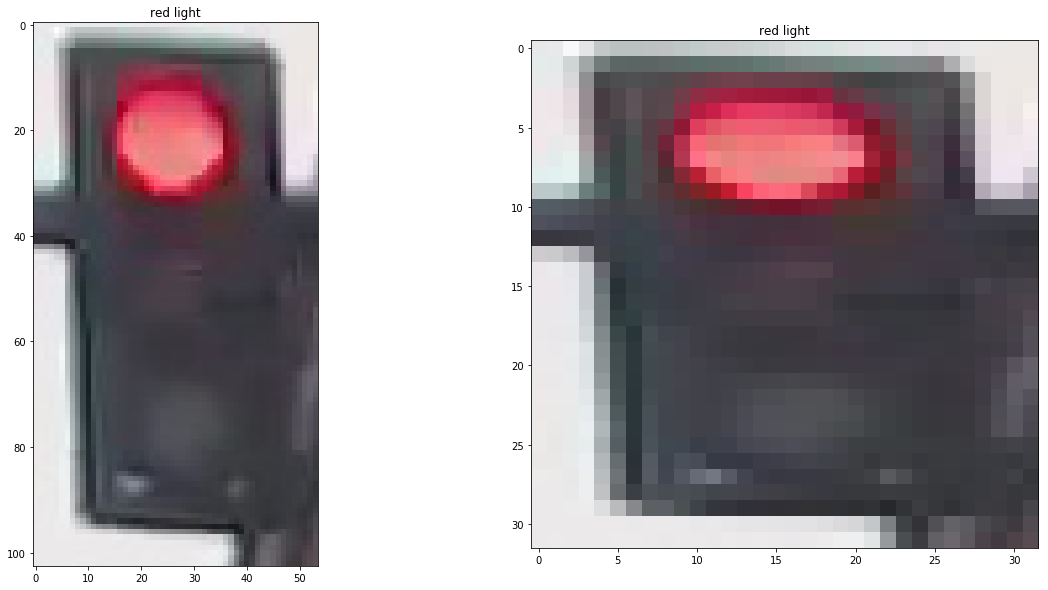

In [413]:
## TODO: Display a standardized image and its label

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

# non standardized image
num = 23
red_image = IMAGE_LIST[num][0]
red_label = 'red'
ax1.set_title(red_label + ' light')
ax1.imshow(red_image)

# standardized image
red_image = STANDARDIZED_LIST[num][0]
red_label = 'red'
ax2.set_title(red_label + ' light')
ax2.imshow(red_image)

## 3. Feature Extraction

## RGB to HSV conversion

Label [red, yellow, green]: [1, 0, 0]


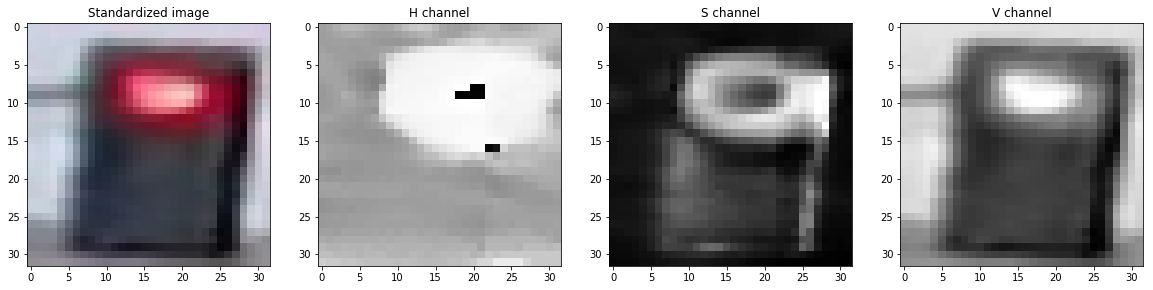

In [414]:
# Convert and image to HSV colorspace
# Visualize the individual color channels

image_num = 0
test_im = STANDARDIZED_LIST[image_num][0]
test_label = STANDARDIZED_LIST[image_num][1]

# Convert to HSV
hsv = cv2.cvtColor(test_im, cv2.COLOR_RGB2HSV)

# Print image label
print('Label [red, yellow, green]: ' + str(test_label))

# HSV channels
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

# Plot the original image and the three channels
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,10))
ax1.set_title('Standardized image')
ax1.imshow(test_im)
ax2.set_title('H channel')
ax2.imshow(h, cmap='gray')
ax3.set_title('S channel')
ax3.imshow(s, cmap='gray')
ax4.set_title('V channel')
ax4.imshow(v, cmap='gray')


---
### (IMPLEMENTATION): Create a brightness feature that uses HSV color space

In [415]:
## DEPENDENT SNIPPETS
def getMaskedImage(image, label):
    """
    Returns the masked image as per label specified. 
    NOTE INCOMING IMAGE IS RGB (if you used cv.imread,it would be BGR. I used matplotlib imread)
    """
    # first convert to HSV
    image_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    
    if label is 'red':
        red_mask_hsv1 = cv2.inRange(image_hsv, (0,30,50), (10,255,255))
        red_mask_hsv2 = cv2.inRange(image_hsv, (150,40,50), (180,255,255))
        mask_hsv = cv2.bitwise_or(red_mask_hsv1,red_mask_hsv2)
    elif label is 'yellow':
        mask_hsv = cv2.inRange(image_hsv, (10,10,110),(31,255,255))   
    else: # green
        mask_hsv = cv2.inRange(image_hsv,(43,40,120),(95,255,255)) 
        
    # standard mask operations to extract out specified label color
    mask_hsv = cv2.bitwise_not(mask_hsv)  # invert the mask
    masked_image = np.copy(image)
    masked_image[mask_hsv != 0] = [0, 0, 0] 
    
    return masked_image

def getHSVSum(image):
    """
    Input: RGB image (ensure, its not BGR)
    Output: HSV sums individually
    """
    # first convert to HSV
    image_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    
    # HSV channels
    h = image_hsv[:,:,0]
    s = image_hsv[:,:,1]
    v = image_hsv[:,:,2]
    h_sum = np.sum(h[:,:],axis=1)
    s_sum = np.sum(s[:,:],axis=1)
    v_sum = np.sum(v[:,:],axis=1)    
    
    return (h_sum, s_sum, v_sum)

In [416]:
## TODO: Create a brightness feature that takes in an RGB image and outputs a feature vector and/or value
## This feature should use HSV colorspace values   
def create_feature(rgb_image):
       
    # crop the images first
    image = rgb_image[2:-2, 7:-7, :]    
    
    # image dimensions
    (width,height,_) = image.shape
    area = width*height         
    
    # apply all masks and get results
    r_mask = getMaskedImage(image,'red') 
    y_mask = getMaskedImage(image,'yellow') 
    g_mask = getMaskedImage(image,'green') 
    
    # get hsv_sum graphs
    r_hsv_sum = getHSVSum(r_mask)
    y_hsv_sum = getHSVSum(y_mask)
    g_hsv_sum = getHSVSum(g_mask)
    
    # get v channel (brightness)
    r_hsv_sum_v = r_hsv_sum[2]
    y_hsv_sum_v = y_hsv_sum[2]
    g_hsv_sum_v = g_hsv_sum[2]
    
    # get associated metrics for each v channel
    
    # 1. average brightness normalized across area 
    r_hsv_sum_v_avg = round(np.sum(r_hsv_sum_v)/area,1)    
    y_hsv_sum_v_avg = round(np.sum(y_hsv_sum_v)/area,1)
    g_hsv_sum_v_avg = round(np.sum(g_hsv_sum_v)/area,1)
    
    # 2. max brightness (both x and y) normalized across area. 
    #'x' denotes location across height of image
    r_hsv_sum_v_max_x = np.argmax(r_hsv_sum_v)
    y_hsv_sum_v_max_x = np.argmax(y_hsv_sum_v)
    g_hsv_sum_v_max_x = np.argmax(g_hsv_sum_v)

    r_hsv_sum_v_max_y = round(r_hsv_sum_v[r_hsv_sum_v_max_x]/width,1)
    y_hsv_sum_v_max_y = round(y_hsv_sum_v[y_hsv_sum_v_max_x]/width,1)
    g_hsv_sum_v_max_y = round(g_hsv_sum_v[g_hsv_sum_v_max_x]/width,1)
      
    
    ## FEATURE CLASSIFICATION. returns ['red'] or ['yellow'] or ['green']
    feature = [0,0,0] # one hot encoding in order of red, yellow, green
    # 1. choose whick masked image has highest max
    max_max_y = np.argmax([r_hsv_sum_v_max_y, y_hsv_sum_v_max_y, g_hsv_sum_v_max_y])
    max_avg = np.argmax([r_hsv_sum_v_avg, y_hsv_sum_v_avg, g_hsv_sum_v_avg])
    
    if (max_max_y == 0) and (max_avg == 0): # red
        feature[0] = 1 
    elif (max_max_y == 1) and (max_avg == 1): # yellow
        feature[1] = 1 
    elif (max_max_y == 2) and (max_avg == 2): # green
        feature[2] = 1
    
    # UPDATE 1
    if (g_hsv_sum_v_avg < r_hsv_sum_v_avg) and (g_hsv_sum_v_max_y > r_hsv_sum_v_max_y) and (g_hsv_sum_v_max_x > 20):
        feature[2] = 1
        
        
    #print(list(feature))            
    return feature

# 4. Classification and Visualizing Error

### (IMPLEMENTATION): Build a complete classifier 

In [417]:
# This function should take in RGB image input
# Analyze that image using your feature creation code and output a one-hot encoded label
def estimate_label(rgb_image):
    
    ## TODO: Extract feature(s) from the RGB image and use those features to
    ## classify the image and output a one-hot encoded label
    predicted_label = create_feature(rgb_image)    
    
    return predicted_label  

In [418]:
# Using the load_dataset function in helpers.py
# Load test data
TEST_IMAGE_LIST = helpers.load_dataset(IMAGE_DIR_TEST)

# Standardize the test data
STANDARDIZED_TEST_LIST = standardize(TEST_IMAGE_LIST)

# Shuffle the standardized test data
random.shuffle(STANDARDIZED_TEST_LIST)

In [419]:
# Constructs a list of misclassified images given a list of test images and their labels
# This will throw an AssertionError if labels are not standardized (one-hot encoded)

def get_misclassified_images(test_images):
    # Track misclassified images by placing them into a list
    misclassified_images_labels = []

    # Iterate through all the test images
    # Classify each image and compare to the true label
    for image in test_images:

        # Get true data
        im = image[0]
        true_label = image[1]
        assert(len(true_label) == 3), "The true_label is not the expected length (3)."

        # Get predicted label from your classifier
        predicted_label = estimate_label(im)
        assert(len(predicted_label) == 3), "The predicted_label is not the expected length (3)."

        # Compare true and predicted labels 
        if(predicted_label != true_label):
            # If these labels are not equal, the image has been misclassified
            misclassified_images_labels.append((im, predicted_label, true_label))
            
    # Return the list of misclassified [image, predicted_label, true_label] values
    return misclassified_images_labels


# Find all misclassified images in a given test set
MISCLASSIFIED = get_misclassified_images(STANDARDIZED_TEST_LIST)

# Accuracy calculations
total = len(STANDARDIZED_TEST_LIST)
num_correct = total - len(MISCLASSIFIED)
accuracy = num_correct/total

print('Accuracy: ' + str(accuracy))
print("Number of misclassified images = " + str(len(MISCLASSIFIED)) +' out of '+ str(total))


Accuracy: 0.9663299663299664
Number of misclassified images = 10 out of 297


### Visualize the misclassified images

Actual label: [0, 0, 1]
Predicted label: [1, 0, 0]


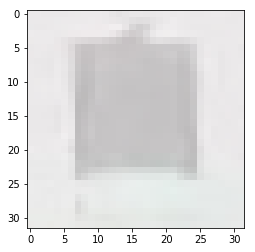

In [420]:
# Visualize misclassified example(s)
## TODO: Display an image in the `MISCLASSIFIED` list 
## TODO: Print out its predicted label - to see what the image *was* incorrectly classified as
import matplotlib.pyplot as plt

num = 0
misclassified_image = MISCLASSIFIED[num][0]
misclassified_label = MISCLASSIFIED[num][1]
true_label = MISCLASSIFIED[num][2]

print('Actual label: {}'.format(list(true_label)))
print('Predicted label: {}'.format(list(misclassified_label)))
plt.imshow(misclassified_image)

In [421]:
%matplotlib inline 

from IPython.display import Image, display, HTML
#from loaders import STANDARDIZED_LIST
import matplotlib.pyplot as plt
from matplotlib import animation
import cv2
import numpy as np
from random import randint



nrows = 12
ncols = 5   
f, axArray = plt.subplots(nrows, ncols, figsize=(10,20))  # 12 rows, 5 cols
f.tight_layout()
plt.subplots_adjust(bottom=0.15, hspace=1)

def getSeparateLists(image_list):
    """
    Assuming list is standardized and having label attached to identify, 
    we will create 3 separate lists and send.
    NOTE LABEL STRIPPED AND ID ATTACHED
    """
    red_images = []    
    yellow_images = []
    green_images = []
    for index, each_image_label_pair in enumerate(image_list):  
        image = each_image_label_pair[0]
        label = each_image_label_pair[2]  # for misclassified images list
        if label[0] == 1:
            red_images.append((image, index))
        elif label[1] == 1:
            yellow_images.append((image,index))
        else:
            green_images.append((image,index))
            
    return (red_images,yellow_images,green_images)

def getMaskedImage(image, label):
    """
    Returns the masked image as per label specified. For eg, label as 'Red' would 
    result in red areas extracted out of incoming image, and resultant image returned.
    NOTE INCOMING IMAGE IS RGB (if you used cv.imread,it would be BGR. I used matplotlib imread)
    """
    # first convert to HSV
    image_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    
    if label is 'red':
        red_mask_hsv1 = cv2.inRange(image_hsv, (0,30,50), (10,255,255))
        red_mask_hsv2 = cv2.inRange(image_hsv, (150,40,50), (180,255,255))
        mask_hsv = cv2.bitwise_or(red_mask_hsv1,red_mask_hsv2)
    elif label is 'yellow':
        mask_hsv = cv2.inRange(image_hsv, (10,10,110),(31,255,255))   
    else: # green
        mask_hsv = cv2.inRange(image_hsv,(43,40,120),(95,255,255)) 
        
    # standard mask operations to extract out specified label color
    mask_hsv = cv2.bitwise_not(mask_hsv)  # invert the mask
    masked_image = np.copy(image)
    masked_image[mask_hsv != 0] = [0, 0, 0] 
    
    return masked_image

def getHSVSum(image):
    """
    Input: RGB image (ensure, its not BGR)
    Output: HSV sums individually
    """
    # first convert to HSV
    image_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    
    # HSV channels
    h = image_hsv[:,:,0]
    s = image_hsv[:,:,1]
    v = image_hsv[:,:,2]
    h_sum = np.sum(h[:,:],axis=1)
    s_sum = np.sum(s[:,:],axis=1)
    v_sum = np.sum(v[:,:],axis=1)    
    
    return (h_sum, s_sum, v_sum)

# what if
def getHSVMax(image):
    """
    Input: RGB image (ensure, its not BGR)
    Output: HSV max individually
    """
    # first convert to HSV
    image_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    
    # HSV channels
    h = image_hsv[:,:,0]
    s = image_hsv[:,:,1]
    v = image_hsv[:,:,2]
    h_max = h.max(axis=1)
    s_max = h.max(axis=1)
    v_max = h.max(axis=1)    
    
    return (h_max, s_max, v_max)


# 723 to 757 is yellow 
def animate(frame_index):

    [axArray[i,j].clear() for i in range(0,nrows) for j in range(0,ncols)] 
    
    axArray[0,1].set_title('H Sum')
    axArray[0,2].set_title('S Sum')
    axArray[0,3].set_title('V Sum')    
    axArray[0,4].set_title('V Metrics')    
        
    
    # each label type would form 4 rows with 4 cols each
    # so below for loop is going to iterate 3 times, that is 'k' = 0,1,2
    nrows_1 = 4 # per image or per label 4 rows.         
    for k, each_list in enumerate(MISCLASSIFIED_DIVIDED_LIST):  
    
        #print(k, len(each_list))
        
        if (len(each_list) == 0): continue
    
        # get the image        
        num = randint(0, len(each_list)-1)  
        image = each_list[num][0]
        index = each_list[num][1]
    
        # crop it
        image = image[2:-2, 7:-7, :]    
        
        # always do this after crop
        (width,height,_) = image.shape
        area = width*height           
    
        # initialize axes
        axArray[k*nrows_1,0].set_title('ID: {}'.format(index))  
        #[axArray[i,j].set_ylim([width,0]) for i in range(0,nrows) for j in range(1,ncols)]    
        #[axArray[i,j].set_xlim([0,130]) for i in range(0,nrows) for j in range(1,ncols)]    
        
        # show original image
        axArray[k*nrows_1,0].imshow(image)
        
        # differentiate labels with bg color
        label_bg = ['#fbe9e7', '#fff9c4', '#e8f5e9']
        [axArray[i,j].set_facecolor(label_bg[k]) for i in range(k*nrows_1+1,k*nrows_1+4) for j in range(1,ncols)]        
        
        labels = ['red', 'yellow', 'green']
        for i in range(1,nrows_1):

            # per row operation
            label = labels[i-1]
            masked_image = getMaskedImage(image,label)        # masked image
            axArray[k*nrows_1+i,0].set_title(label + 'mask')    
            axArray[k*nrows_1+i,0].imshow(masked_image, cmap='gray')    
            
            hsv_sum = getHSVSum(masked_image)   # HSV sums of masked image
            
            # per cell operation
            for j in range(1,ncols-1):  # last col for V metrics
                
                # initialization
                axArray[k*nrows_1+i,j].set_ylim([0,width])
                axArray[k*nrows_1+i,j].set_xlim([0,130])
                
                summy = hsv_sum[j-1]
                summy_avg = summy/width                
                average = round(np.sum(summy)/area,1) # normalized avg across area                
                max_x = np.argmax(summy)
                #max_y = round(summy_avg[max_x],1)
                text = 'Avg B: ' + str(average) + '\nMax at: ' + str(max_x)
                
                # rotate to maka graph comparable to image
                x_new = np.linspace(0,len(summy_avg),len(summy_avg))
                axArray[k*nrows_1+i,j].invert_yaxis()
                axArray[k*nrows_1+i,j].plot(summy_avg, x_new)                                               
                #axArray[k*nrows_1+i,j].annotate(text,xy=(0.4, 0.5), xycoords="axes fraction")                            
                    
                # show only if curve is big enough
                #if average > 1:
                    #axArray[k*nrows_1+i,j].axhline(y=max_x, color='r')
                    
            # V metrics
            summy = hsv_sum[j-1]
            summy_avg = summy/width                
            average = round(np.sum(summy)/area,1) # normalized avg across area                
            max_x = np.argmax(summy)
            max_y = round(summy_avg[max_x],1)                       
            text = 'Avg: ' + str(average) + '\nMax: ' + str(max_y) + '\nMax at: ' + str(max_x)
            
            axArray[k*nrows_1+i,4].annotate(text,xy=(0.1, 0.2), xycoords="axes fraction")                                        
            
        
    
                    
MISCLASSIFIED_DIVIDED_LIST = getSeparateLists(MISCLASSIFIED)
print(len(MISCLASSIFIED_DIVIDED_LIST[2]))
anim = animation.FuncAnimation(f, animate, frames=10, interval=1000)

plt.close()
HTML(anim.to_html5_video())

9
